In [1]:
import lmdb
import example_pb2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_lmdb_dir = './data/train.lmdb'
reader = lmdb.open(path_to_lmdb_dir)
txn = reader.begin()
cursor = txn.cursor()

In [3]:
cursor.next()
key, value = cursor.item()
example = example_pb2.Example()
example.ParseFromString(value)
print('key:', key.decode())

key: 00000001


In [4]:
image = np.frombuffer(example.image, dtype=np.uint8)
length = example.length
digits = example.digits

length: 2, digits: 3,2,10,10,10


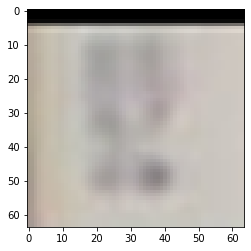

In [6]:
print('length: %d, digits: %d,%d,%d,%d,%d' % (
    length, digits[0], digits[1], digits[2], digits[3], digits[4]))

imshow(image.reshape([64, 64, 3]))

In [7]:
cursor.close()
reader.close()